In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sci378 import *

Version:  0.0.18


In [3]:
from lmfit import *

See: https://lmfit.github.io/lmfit-py/builtin_models.html  for more examples

In [4]:
x_data,y_data=(array([-10.        ,  -8.94736842,  -7.89473684,  -6.84210526,
         -5.78947368,  -4.73684211,  -3.68421053,  -2.63157895,
         -1.57894737,  -0.52631579,   0.52631579,   1.57894737,
          2.63157895,   3.68421053,   4.73684211,   5.78947368,
          6.84210526,   7.89473684,   8.94736842,  10.        ]),
 array([ 84.5439605 ,  79.96429095,  53.29446178,  15.49595419,
         55.59294258,  57.74976334, -17.47795207,  19.03107704,
        -31.19976545, -10.54910001,  17.56865009,   5.42434731,
         -9.60203555,  21.4654494 ,  44.94972133,   6.80172884,
         62.75223289,  58.16212626, 111.04251023,  83.52494712]))

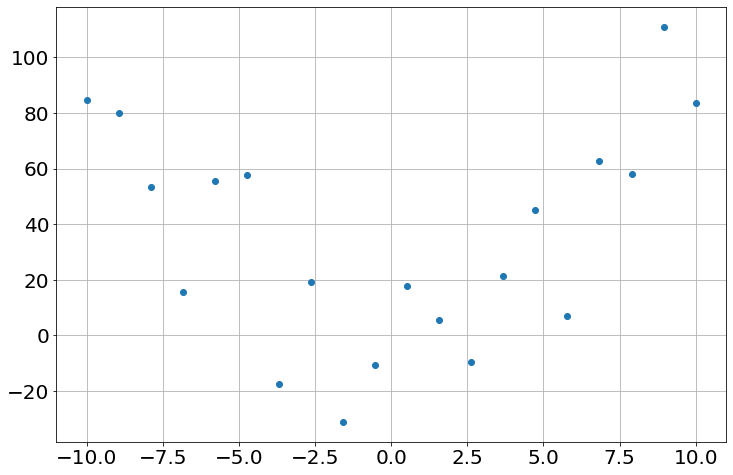

In [5]:
plot(x_data,y_data,'o')

## Step 1 - define the function

In [6]:
def quad(x,a=1,b=1,c=1):
    return a*x**2 + b*x + c

## Step 2 - define the model and construct the parameter list

In [7]:
qmodel=Model(quad)   # from lmfit

In [8]:
qmodel.param_names

['a', 'b', 'c']

In [9]:
params=qmodel.make_params()
params

name,value,initial value,min,max,vary
a,1.00000000,None,-inf,inf,True
b,1.00000000,None,-inf,inf,True
c,1.00000000,None,-inf,inf,True


## Step 3 - modify the parameter list (min, max, etc...) as needed

In [10]:
params['a']=Parameter("a",min=0,value=0.5)

## Step 4 - do the fit, look at the parameter values (do they make sense?), etc...

In [13]:
result = qmodel.fit(y_data, params, x=x_data,method="powell")

In [14]:
result

## Step 5 - plot your data and the predictions of the model

In [15]:
x2=linspace(-12,12,20)
y2=-.9*x2**2+.6*x2-.6
x2,y2

(array([-12.        , -10.73684211,  -9.47368421,  -8.21052632,
         -6.94736842,  -5.68421053,  -4.42105263,  -3.15789474,
         -1.89473684,  -0.63157895,   0.63157895,   1.89473684,
          3.15789474,   4.42105263,   5.68421053,   6.94736842,
          8.21052632,   9.47368421,  10.73684211,  12.        ]),
 array([-137.4       , -110.79390582,  -87.0598338 ,  -66.19778393,
         -48.20775623,  -33.08975069,  -20.84376731,  -11.46980609,
          -4.96786704,   -1.33795014,   -0.5800554 ,   -2.69418283,
          -7.68033241,  -15.53850416,  -26.26869806,  -39.87091413,
         -56.34515235,  -75.69141274,  -97.90969529, -123.        ]))

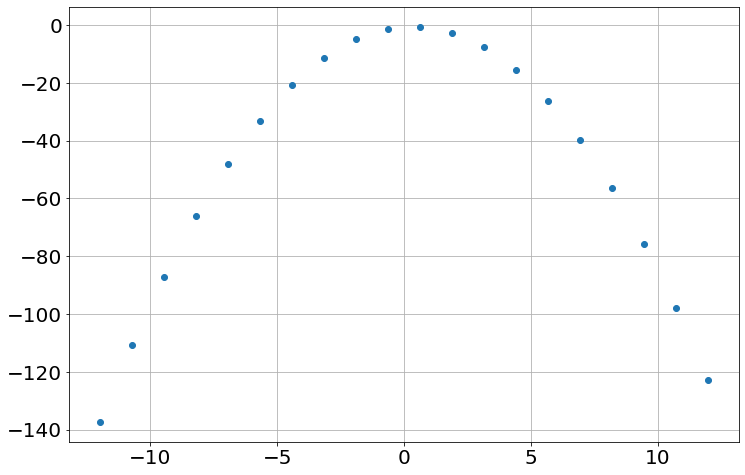

In [16]:
plot(x2,y2,'o')

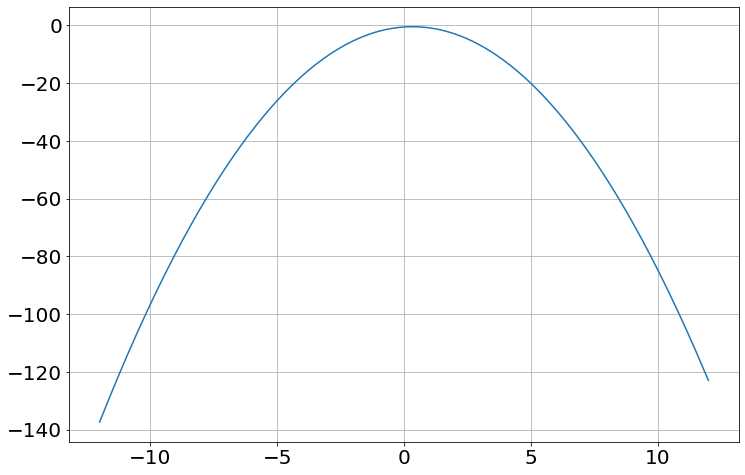

In [17]:
x2=linspace(-12,12,200)
y2=-.9*x2**2+.6*x2-.6
plot(x2,y2,'-')

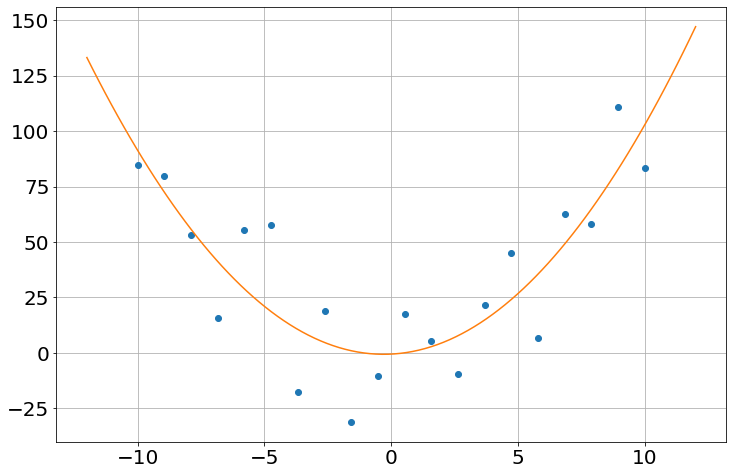

In [23]:
plot(x_data,y_data,'o')

x_fake=linspace(-12,12,100)
y_fake=result.eval(x=x_fake)
plot(x_fake,y_fake,'-')

## Sometimes the function already exists in lmfit - but might have different names for parameters

https://lmfit.github.io/lmfit-py/builtin_models.html

In [24]:
qmodel=models.QuadraticModel()

In [25]:
qmodel.param_names

['a', 'b', 'c']

In [26]:
params=qmodel.make_params()

In [27]:
result = qmodel.fit(y_data, params, x=x_data)

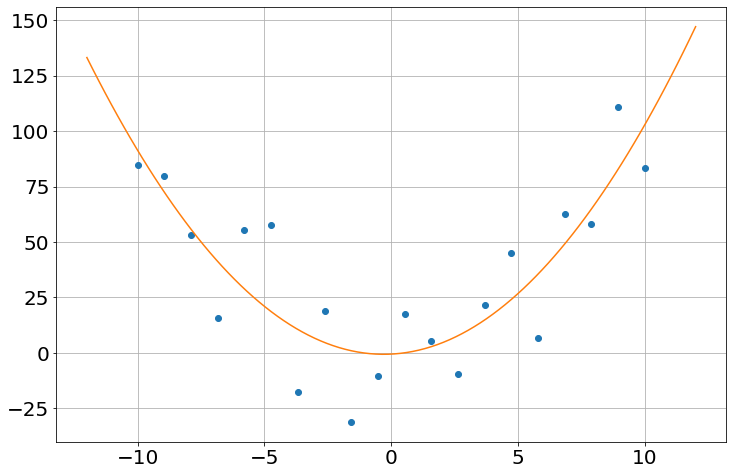

In [28]:
plot(x_data,y_data,'o')

x_fake=linspace(-12,12,100)
y_fake=result.eval(x=x_fake)
plot(x_fake,y_fake,'-')

## random population file

In [9]:
data=pd.read_csv('data/s007.csv')
x_data=data['year']
y_data=data['population (millions)']
data

,year,population (millions),source
0,1700.0,5.835,Griffith
1,1710.0,6.013,Griffith
2,1720.0,6.048,Griffith
3,1730.0,6.008,Griffith
4,1740.0,6.013,Griffith
5,1750.0,6.253,Griffith
6,1760.0,6.665,Griffith
7,1770.0,7.124,Griffith
8,1780.0,7.581,Griffith
9,1790.0,8.216,Griffith


(do not use the quad model on this data - bad -- but I'm showing something else, so I'll do it anyway)

In [10]:
qmodel=models.QuadraticModel()
params=qmodel.make_params()
result = qmodel.fit(y_data, params, x=x_data)

ValueError: operands could not be broadcast together with shapes (31,) (32,) 

# Another Data Set


In [9]:
x_data,y_data=(array([0.        , 0.12820513, 0.25641026, 0.38461538, 0.51282051,
        0.64102564, 0.76923077, 0.8974359 , 1.02564103, 1.15384615,
        1.28205128, 1.41025641, 1.53846154, 1.66666667, 1.79487179,
        1.92307692, 2.05128205, 2.17948718, 2.30769231, 2.43589744,
        2.56410256, 2.69230769, 2.82051282, 2.94871795, 3.07692308,
        3.20512821, 3.33333333, 3.46153846, 3.58974359, 3.71794872,
        3.84615385, 3.97435897, 4.1025641 , 4.23076923, 4.35897436,
        4.48717949, 4.61538462, 4.74358974, 4.87179487, 5.        ]),
 array([ 1.0428932 ,  0.89749902,  0.75670392,  0.64111299,  0.55718173,
         0.52405064,  0.56088843,  0.5490807 ,  0.42480484,  0.47428914,
         0.2934649 ,  0.34352106,  0.33185889,  0.27993667,  0.26003406,
         0.27138304,  0.39834035,  0.28156451,  0.2572975 ,  0.27710445,
         0.15969731,  0.22588548,  0.18106594,  0.15347512,  0.25385423,
         0.20835157,  0.1964213 ,  0.09014651,  0.11874164,  0.14871592,
         0.06117995,  0.19194054,  0.05546755,  0.10819372,  0.13157402,
         0.16435838,  0.04113969, -0.03053311,  0.0710629 ,  0.08495973]))